In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
# Read in csv as df for future use
file_path = 'kanji.csv'
kanji_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify import
print(kanji_df.head())

  Kanji  Wiki_Count  Wiki_Ranking  \
0     年        1562             1   
1     日        1165             2   
2     月         828             3   
3     者         659             4   
4     記         509             5   

                                      Meanings  Grade  JLPT  Radical  \
0                ['year', 'counter for years']    1.0   5.0       51   
1  ['day', 'sun', 'Japan', 'counter for days']    1.0   5.0       72   
2                            ['month', 'moon']    1.0   5.0       74   
3                        ['someone', 'person']    3.0   3.0      125   
4           ['scribe', 'account', 'narrative']    2.0   2.0      149   

   Stroke_Count  Newspaper_Ranking  Novel_Frequency In_Joyo  novel_ranking  \
0             6               29.0         0.004488     Yes           29.0   
1             4                5.0         0.007424     Yes            5.0   
2             4               47.0         0.002995     Yes           46.0   
3             8               31

In [50]:
import matplotlib.pyplot as plt
from matplotlib import font_manager

# List available fonts
available_fonts = [f.name for f in font_manager.fontManager.ttflist]
print(available_fonts)

['cmss10', 'DejaVu Serif', 'STIXGeneral', 'cmr10', 'STIXSizeFourSym', 'cmsy10', 'DejaVu Sans Mono', 'DejaVu Sans', 'STIXGeneral', 'STIXSizeTwoSym', 'STIXGeneral', 'DejaVu Serif', 'STIXNonUnicode', 'STIXSizeFourSym', 'DejaVu Sans', 'DejaVu Serif', 'STIXSizeOneSym', 'cmex10', 'STIXSizeTwoSym', 'STIXSizeThreeSym', 'STIXGeneral', 'STIXNonUnicode', 'cmtt10', 'DejaVu Sans', 'STIXSizeOneSym', 'STIXNonUnicode', 'DejaVu Sans Mono', 'STIXNonUnicode', 'STIXSizeThreeSym', 'DejaVu Sans Mono', 'DejaVu Sans', 'DejaVu Serif Display', 'cmmi10', 'STIXSizeFiveSym', 'cmb10', 'DejaVu Sans Display', 'DejaVu Serif', 'DejaVu Sans Mono', 'Calibri', 'Impact', 'Franklin Gothic Demi Cond', 'Tw Cen MT', 'Consolas', 'Segoe UI', 'Leelawadee', 'Broadway', 'Arial', 'Lucida Bright', 'Bell MT', 'Tw Cen MT', 'Nirmala UI', 'Gigi', 'Nirmala UI', 'BIZ UDGothic', 'Microsoft New Tai Lue', 'Arial', 'Script MT Bold', 'Bodoni MT', 'Georgia', 'Californian FB', 'Ink Free', 'Consolas', 'Lucida Sans Typewriter', 'Book Antiqua', 'Inf

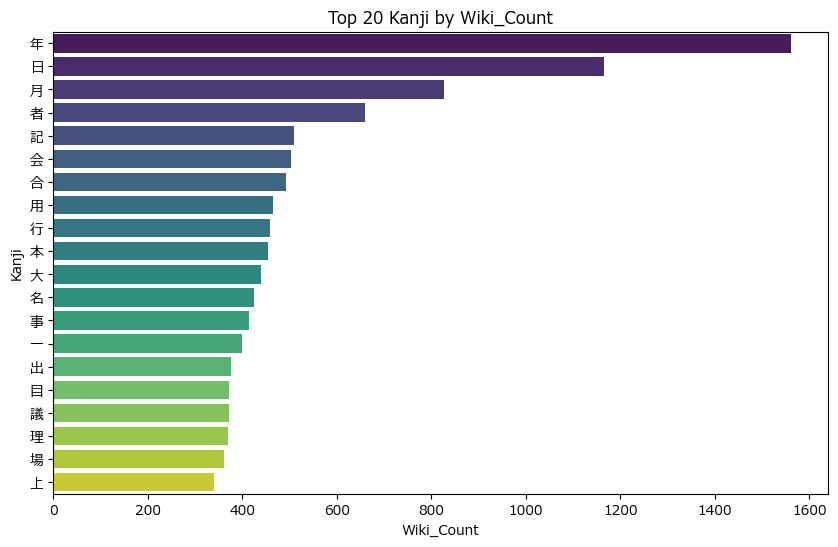

In [88]:
# Set the font to Meiryo
# Allows kanji characters to appear correctly
plt.rcParams['font.family'] = 'Meiryo'

# Filter the DataFrame for Kanji with Wiki_Count > 0
filtered_df = kanji_df[kanji_df['Wiki_Count'] > 0]

# Create a bar plot for top N Kanji by Wiki_Count
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Wiki_Count', y='Kanji', data=filtered_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Kanji by Wiki_Count')
plt.xlabel('Wiki_Count')
plt.ylabel('Kanji')
plt.show()

C:\Users\natel\AppData\Local\Temp\ipykernel_13844\693070382.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['KanjiWithMeanings'] = filtered_df.apply(lambda row: f"{row['Kanji']} - {', '.join(eval(row['Meanings']))}", axis=1)


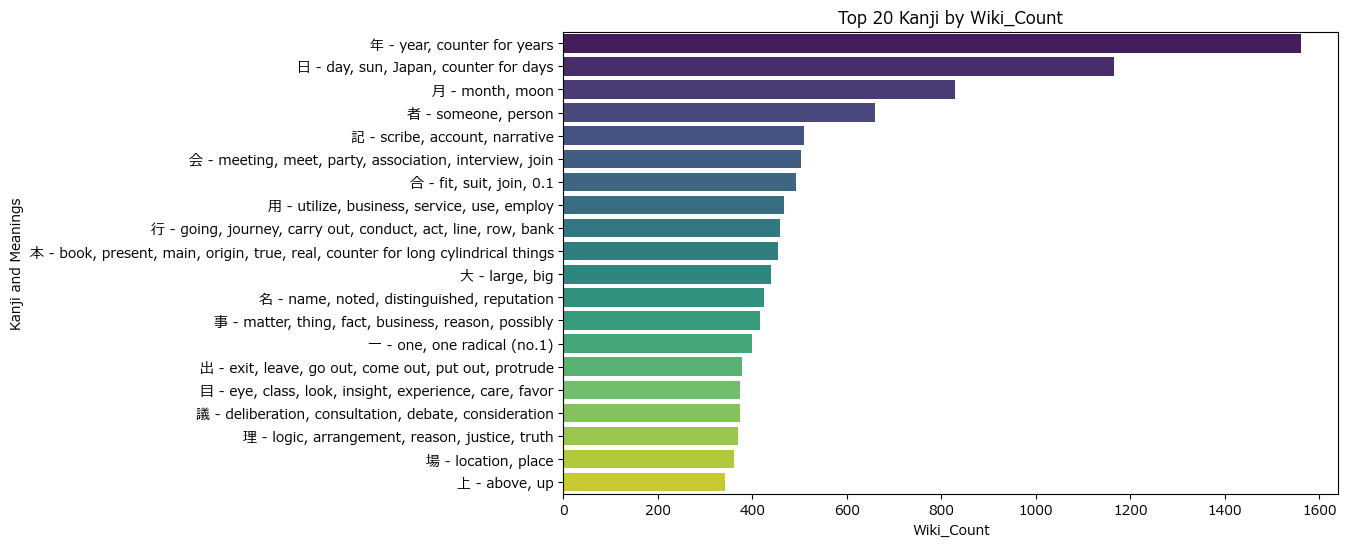

In [99]:
# Set the font to Meiryo
# Allows kanji characters to appear correctly
plt.rcParams['font.family'] = 'Meiryo'

# Filter the DataFrame for Kanji with Wiki_Count > 0
filtered_df = kanji_df[kanji_df['Wiki_Count'] > 0]

# Combine Kanji and Meanings into a single string for y-axis labels
filtered_df['KanjiWithMeanings'] = filtered_df.apply(lambda row: f"{row['Kanji']} - {', '.join(eval(row['Meanings']))}", axis=1)

# Create a bar plot for top N Kanji by Wiki_Count
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x='Wiki_Count', y='KanjiWithMeanings', data=filtered_df.head(top_n), palette='viridis')
plt.title(f'Top {top_n} Kanji by Wiki_Count')
plt.xlabel('Wiki_Count')
plt.ylabel('Kanji and Meanings')
plt.show()

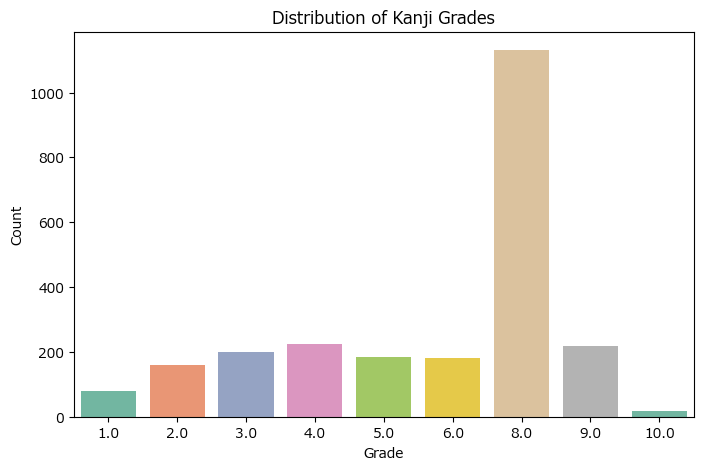

In [89]:
# Plot 2: Distribution of Grade levels
plt.figure(figsize=(8, 5))
sns.countplot(x='Grade', data=kanji_df, palette='Set2')
plt.title('Distribution of Kanji Grades')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

C:\Users\natel\AppData\Local\Temp\ipykernel_13844\2926648348.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Stroke_Count', y='Wiki_Count', data=grouped_on_stroke_count, ci=None)


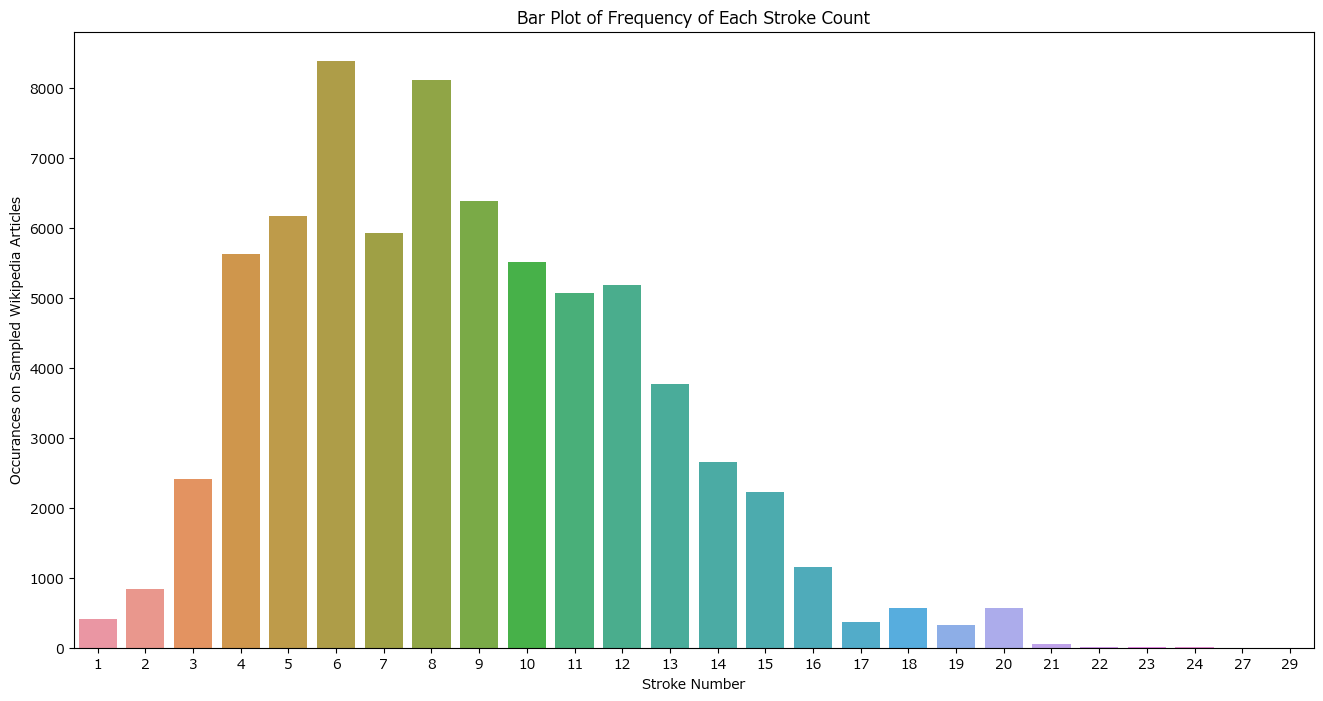

In [54]:
# Group by Stroke_Count and sum Wiki_Counts
grouped_on_stroke_count = kanji_df.groupby('Stroke_Count')['Wiki_Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(16, 8))
sns.barplot(x='Stroke_Count', y='Wiki_Count', data=grouped_on_stroke_count, ci=None)
plt.title('Bar Plot of Frequency of Each Stroke Count')
plt.xlabel('Stroke Number')
plt.ylabel('Occurances on Sampled Wikipedia Articles')
plt.show()

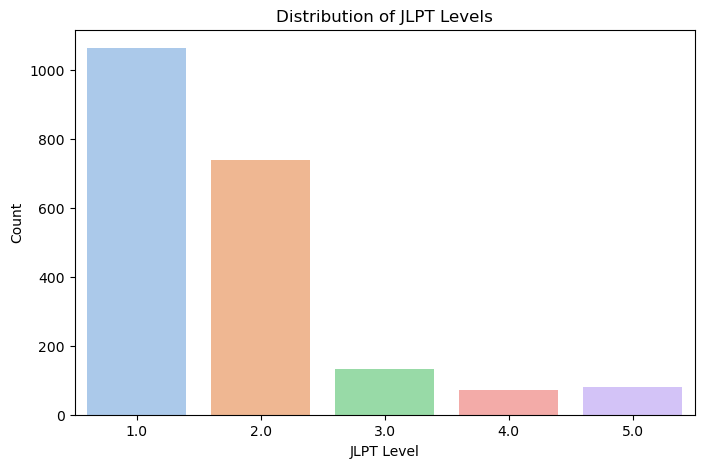

In [43]:
# Plot 5: Distribution of JLPT levels
plt.figure(figsize=(8, 5))
sns.countplot(x='JLPT', data=kanji_df, palette='pastel')
plt.title('Distribution of JLPT Levels')
plt.xlabel('JLPT Level')
plt.ylabel('Count')
plt.show()

C:\Users\natel\AppData\Local\Temp\ipykernel_13844\2745004194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = kanji_df.corr()


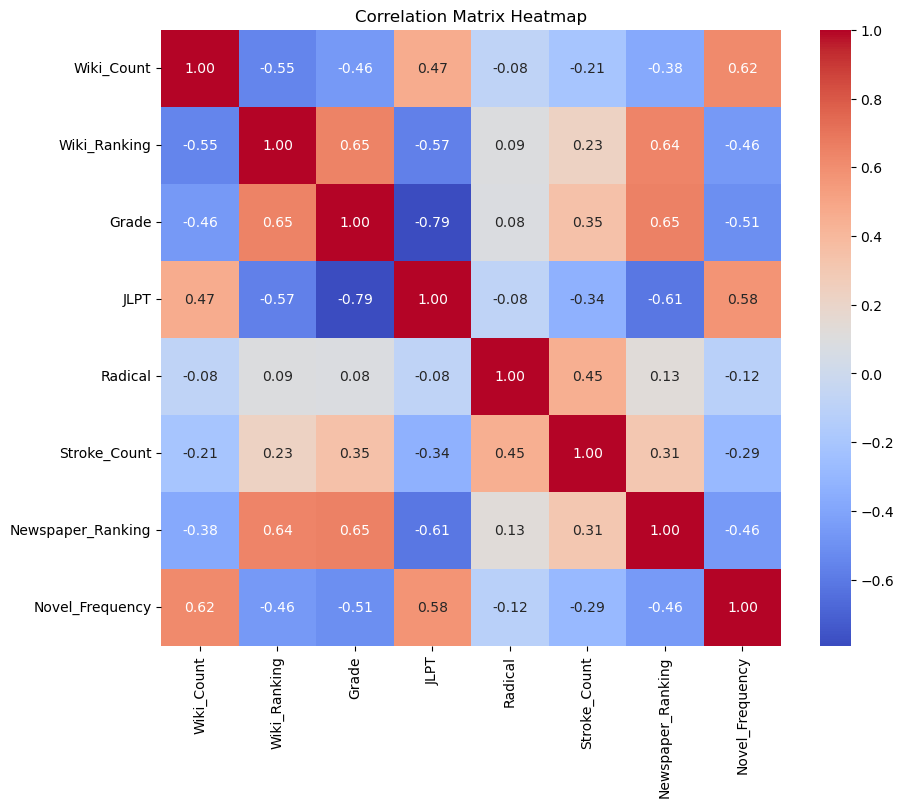

In [12]:
# Plot 9: Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = kanji_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

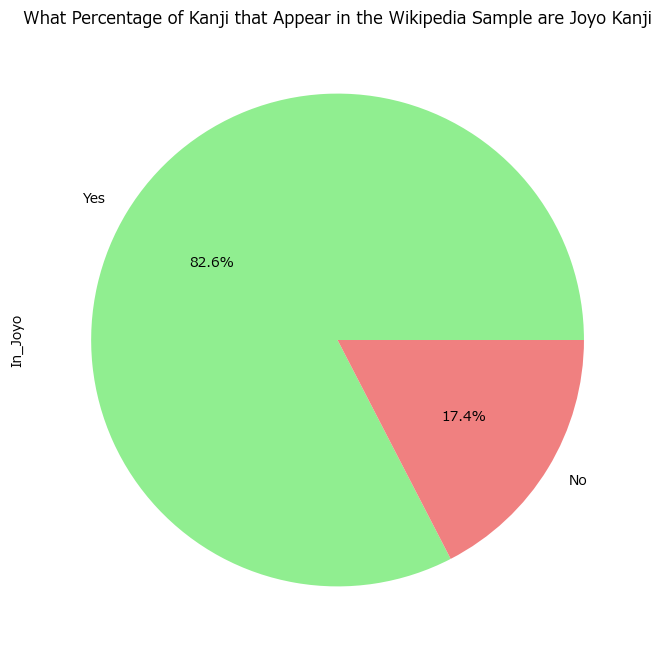

In [90]:
# Filter the DataFrame for Kanji with Wiki_Count > 0
filtered_df = kanji_df[kanji_df['Wiki_Count'] > 0]

# Create a pie chart for In_Joyo distribution
plt.figure(figsize=(8, 8))
filtered_df['In_Joyo'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('What Percentage of Kanji that Appear in the Wikipedia Sample are Joyo Kanji')
plt.show()

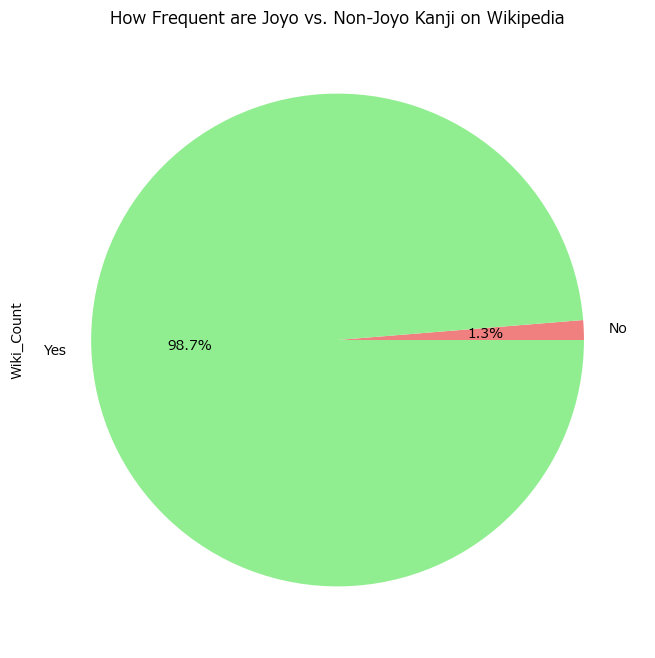

In [91]:
# Calculate the summed Wiki_Count percentages for In_Joyo and Not In_Joyo
summed_percentages = kanji_df.groupby('In_Joyo')['Wiki_Count'].sum() / kanji_df['Wiki_Count'].sum()

# Create a pie chart for the summed Wiki_Count percentages
plt.figure(figsize=(8, 8))
colors = ['lightcoral', 'lightgreen']  # Swap the order of colors
summed_percentages.plot.pie(autopct='%1.1f%%', colors=colors)
plt.title('How Frequent are Joyo vs. Non-Joyo Kanji on Wikipedia')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


     Kanji    mean_diff
97       票  1633.333333
197      該  1565.333333
246      訂  1434.666667
48       項  1407.333333
503      栽  1362.666667
47       削  1344.666667
584      販  1307.333333
635      緯  1283.333333
2188     又  1275.333333
2274     茶  1193.333333


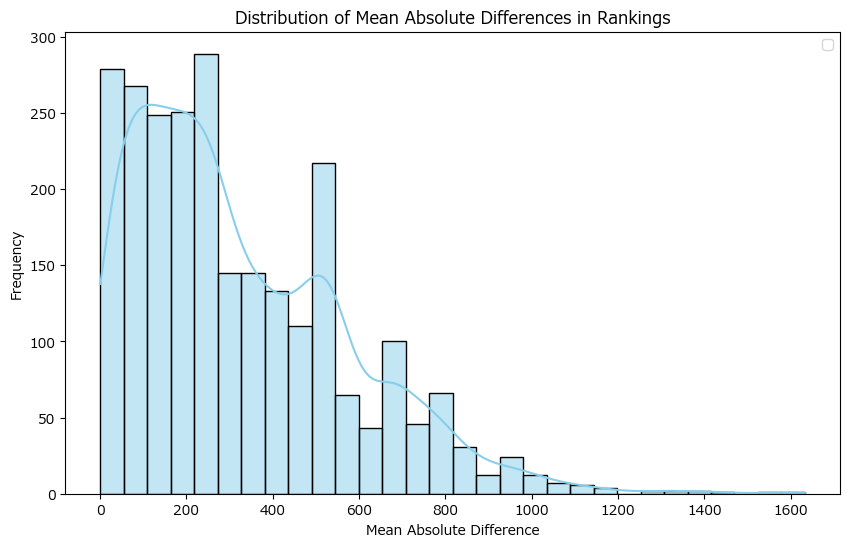

In [83]:
# Assuming your DataFrame is named kanji_df

max_cutoff= 2546

# Replace values exceeding the cutoff with the cutoff value
kanji_df['Newspaper_Ranking'] = kanji_df['Newspaper_Ranking'].apply(lambda x: min(x, max_cutoff))

# Calculate the mean absolute difference for each kanji
kanji_df['mean_diff'] = kanji_df.apply(lambda row: abs(row['Novel_Ranking'] - row['Wiki_Ranking']) +
                                                  abs(row['Novel_Ranking'] - row['Newspaper_Ranking']) +
                                                  abs(row['Wiki_Ranking'] - row['Newspaper_Ranking']), axis=1) / 3

# Display the DataFrame with the new 'mean_diff' column
print(kanji_df[['Kanji', 'mean_diff']].nlargest(10, 'mean_diff'))

# Plot the mean difference with a separate bar for values exceeding the cutoff
plt.figure(figsize=(10, 6))
sns.histplot(kanji_df['mean_diff'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Mean Absolute Differences in Rankings')
plt.xlabel('Mean Absolute Difference')
plt.ylabel('Frequency')
plt.legend()
plt.show()

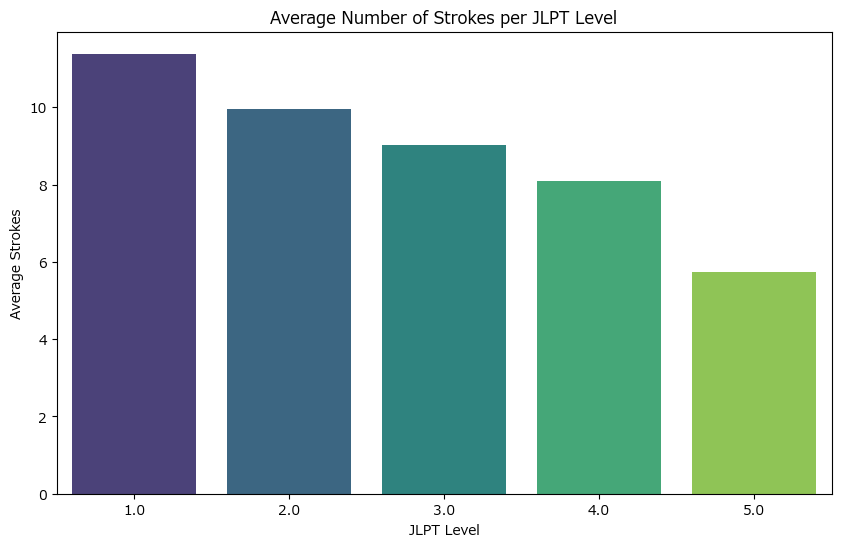

In [84]:
# Filter out rows with NaN values in 'JLPT' and 'Stroke_Count' columns
filtered_df = kanji_df.dropna(subset=['JLPT', 'Stroke_Count'])

# Calculate the average number of strokes per JLPT level
average_strokes = filtered_df.groupby('JLPT')['Stroke_Count'].mean().reset_index()

# Create a bar plot for the average number of strokes by JLPT level
plt.figure(figsize=(10, 6))
sns.barplot(x='JLPT', y='Stroke_Count', data=average_strokes, palette='viridis')
plt.title('Average Number of Strokes per JLPT Level')
plt.xlabel('JLPT Level')
plt.ylabel('Average Strokes')
plt.show()

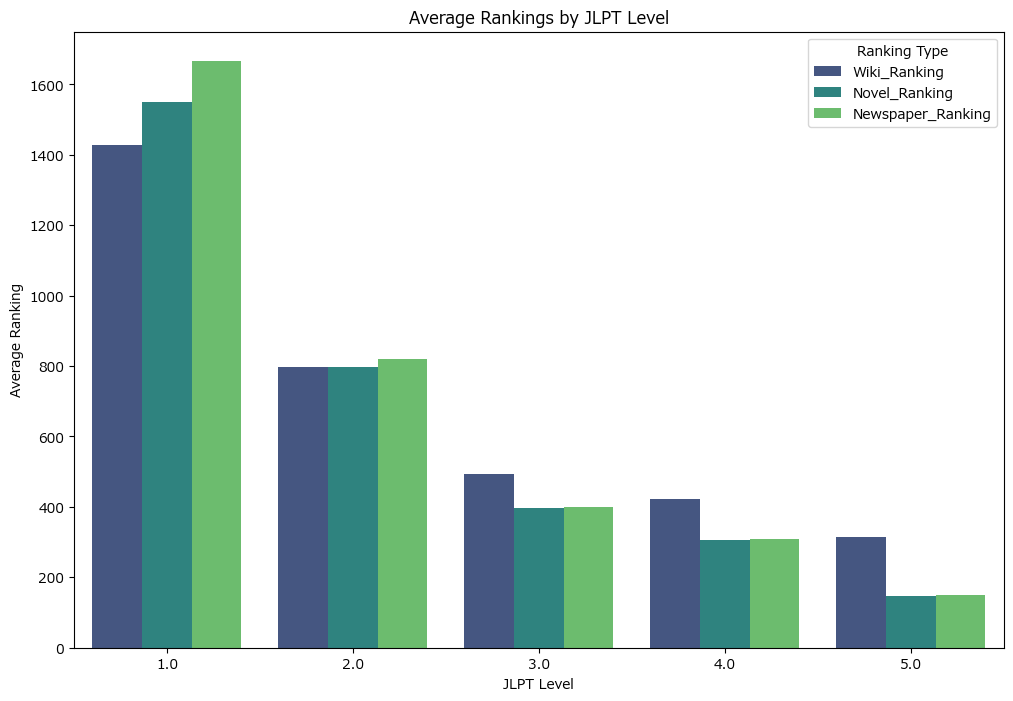

In [95]:
# Filter out rows with NaN values in 'JLPT', 'Wiki_Ranking', 'Novel_Ranking', and 'Newspaper_Ranking' columns
filtered_df = kanji_df.dropna(subset=['JLPT', 'Wiki_Ranking', 'Novel_Ranking', 'Newspaper_Ranking'])

# Calculate the average values per JLPT level
average_values = filtered_df.groupby('JLPT').agg({
    'Wiki_Ranking': 'mean',
    'Novel_Ranking': 'mean',
    'Newspaper_Ranking': 'mean'
}).reset_index()

# Melt the DataFrame for easier plotting
melted_df = pd.melt(average_values, id_vars=['JLPT'], var_name='Ranking Type', value_name='Average Ranking')

# Create a grouped bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='JLPT', y='Average Ranking', hue='Ranking Type', data=melted_df, palette='viridis')
plt.title('Average Rankings by JLPT Level')
plt.xlabel('JLPT Level')
plt.ylabel('Average Ranking')
plt.legend(title='Ranking Type')
plt.show()

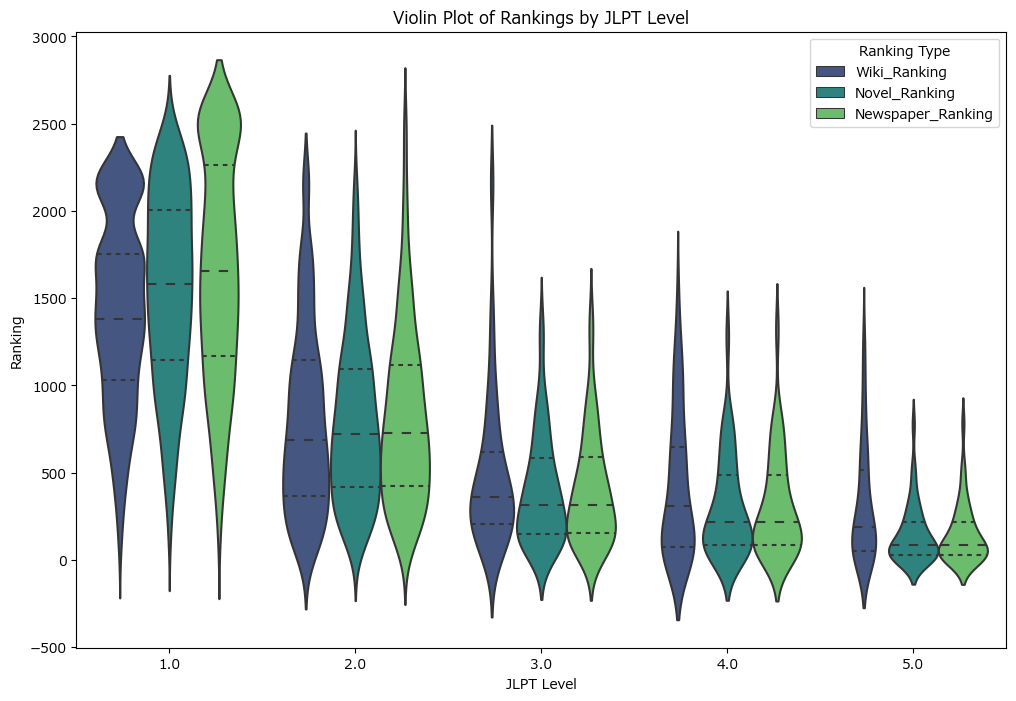

In [96]:
# Filter out rows with NaN values in 'JLPT', 'novel_ranking', 'wiki_ranking', and 'newspaper_ranking' columns
filtered_df = kanji_df.dropna(subset=['JLPT', 'Wiki_Ranking', 'Novel_Ranking', 'Newspaper_Ranking'])

# Melt the DataFrame for easier plotting
melted_df = pd.melt(filtered_df, id_vars=['JLPT'], value_vars=['Wiki_Ranking', 'Novel_Ranking', 'Newspaper_Ranking'],
                    var_name='Ranking Type', value_name='Ranking')

# Create a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='JLPT', y='Ranking', hue='Ranking Type', data=melted_df, dodge=True, inner='quart', palette='viridis')
plt.title('Violin Plot of Rankings by JLPT Level')
plt.xlabel('JLPT Level')
plt.ylabel('Ranking')
plt.legend(title='Ranking Type')
plt.show()

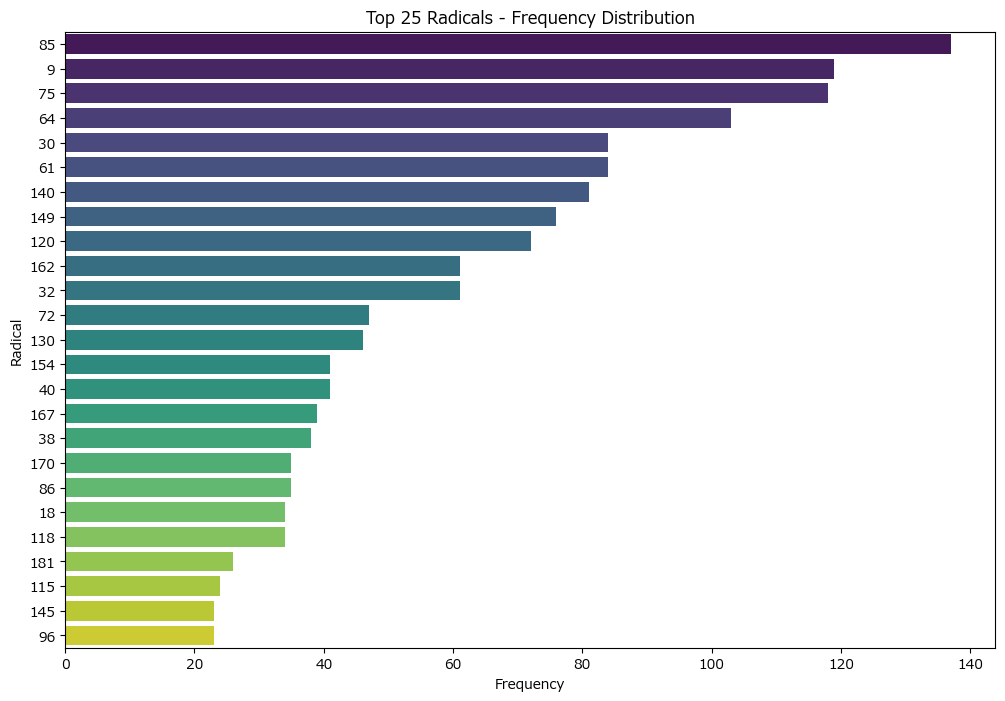

In [97]:
# Get the top 25 most frequent radicals
top_radicals = kanji_df['Radical'].value_counts().head(25).index

# Filter the DataFrame for the top 25 radicals
filtered_df = kanji_df[kanji_df['Radical'].isin(top_radicals)]

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(y='Radical', data=filtered_df, order=top_radicals, palette='viridis')
plt.title('Top 25 Radicals - Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Radical')
plt.show()

In [100]:
# Filter the DataFrame for Kanji not in Joyo
not_in_joyo_df = kanji_df[kanji_df['In_Joyo'] == 'No']

# Get the 5 most frequent Kanji not in Joyo
top_5_not_in_joyo = not_in_joyo_df.nlargest(5, 'Wiki_Count')

# Display the result
print(top_5_not_in_joyo[['Kanji', 'Wiki_Count']])

    Kanji  Wiki_Count
550     蘭          29
783     智          15
785     之          15
814     幌          14
825     乃          14
